<a href="https://colab.research.google.com/github/narendra7959/Deep-Learning-Practicals/blob/main/24040208002_MDSC_302(P)_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# CIFAR-10 Binary Classification Cat and Dog
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [5]:
#  Device setup

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [6]:
# Transform and load CIFAR-10 dataset

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [7]:
#  Select two classes (cat=3, dog=5)

class1, class2 = 3, 5

train_idx = np.where((np.array(train_data.targets) == class1) | (np.array(train_data.targets) == class2))[0]
test_idx = np.where((np.array(test_data.targets) == class1) | (np.array(test_data.targets) == class2))[0]

train_data.targets = np.array(train_data.targets)
test_data.targets = np.array(test_data.targets)

train_subset = Subset(train_data, train_idx)
test_subset = Subset(test_data, test_idx)

# relabel classes to 0 and 1
train_data.targets[train_idx] = (train_data.targets[train_idx] == class2).astype(int)
test_data.targets[test_idx] = (test_data.targets[test_idx] == class2).astype(int)

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

In [8]:
#  Define the CNN Model

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(F.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(F.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = F.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

model = Net().to(device)
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)


In [9]:
#  Training setup

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

In [10]:
# Training loop with train & validation metrics

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # --- Training Step ---
    for images, labels in train_loader:
        labels = (labels == class2).long()
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train

    # --- Validation Step ---
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in test_loader:
            labels = (labels == class2).long()
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(test_loader)
    val_acc = 100 * correct_val / total_val

    print(f"Epoch [{epoch+1}/{epochs}] | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [1/10] | Train Loss: 0.0264, Train Acc: 99.48% | Val Loss: 0.0015, Val Acc: 100.00%
Epoch [2/10] | Train Loss: 0.0009, Train Acc: 100.00% | Val Loss: 0.0006, Val Acc: 100.00%
Epoch [3/10] | Train Loss: 0.0005, Train Acc: 100.00% | Val Loss: 0.0003, Val Acc: 100.00%
Epoch [4/10] | Train Loss: 0.0003, Train Acc: 100.00% | Val Loss: 0.0002, Val Acc: 100.00%
Epoch [5/10] | Train Loss: 0.0002, Train Acc: 100.00% | Val Loss: 0.0002, Val Acc: 100.00%
Epoch [6/10] | Train Loss: 0.0001, Train Acc: 100.00% | Val Loss: 0.0001, Val Acc: 100.00%
Epoch [7/10] | Train Loss: 0.0001, Train Acc: 100.00% | Val Loss: 0.0001, Val Acc: 100.00%
Epoch [8/10] | Train Loss: 0.0001, Train Acc: 100.00% | Val Loss: 0.0001, Val Acc: 100.00%
Epoch [9/10] | Train Loss: 0.0001, Train Acc: 100.00% | Val Loss: 0.0001, Val Acc: 100.00%
Epoch [10/10] | Train Loss: 0.0001, Train Acc: 100.00% | Val Loss: 0.0000, Val Acc: 100.00%


In [11]:
# Final Evaluation

print(f"\n Final Test Accuracy: {val_acc:.2f}%")


 Final Test Accuracy: 100.00%



Predicted: [0 0 0 0 0 0 0 0]


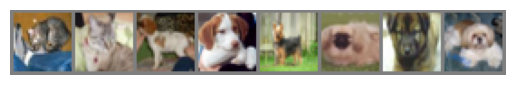

In [12]:
#  Visualize some predictions

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images[:8]))
print("\nPredicted:", predicted[:8].cpu().numpy())